# **Logistic Regression**




## Pengertian Logistic Regression
Logistic regression adalah salah satu teknik statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (kategorikal dengan dua nilai, misalnya 0 dan 1) dengan satu atau lebih variabel independen.  Regresi logistik digunakan untuk memprediksi probabilitas hasil biner (yaitu,
dua kemungkinan hasil seperti “ya” atau “tidak”, spam, atau “bukan spam”).  
Logistic regression digunakan untuk memprediksi probabilitas bahwa sebuah instance termasuk ke dalam salah satu dari dua kategori. Jika probabilitas tersebut lebih besar dari 0.5, maka model akan memprediksi bahwa instance tersebut termasuk ke kategori 1 (misalnya "positif"), jika kurang dari 0.5, model memprediksi kategori 0 (misalnya "negatif")

## Fungsi Sigmoid

Inti dari logistic regression adalah fungsi logistik atau sigmoid, yang digunakan untuk memetakan hasil prediksi ke dalam rentang probabilitas antara 0 dan 1. Fungsi sigmoid ini memiliki bentuk:

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Di mana  adalah kombinasi linier dari variabel input (prediktor).

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$





## Menghitung Gradien

Gradien fungsi cost terhadap $\beta_1$ adalah:
$$
\frac{\partial J(\beta)}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_{i1}
$$

 dimana $x_{i1}$ adalah nilai fitur pertama untuk observasi ke-i, dan $\hat{y}_i$ adalah probabilitas
 yang diprediksi untuk observasi ke-i.


## Memperbarui $\beta_1$

Untuk memperbarui $\beta_1$ menggunakan fungsi berikut:
$$
\beta_j := \beta_j - \alpha \cdot \frac{\partial J(\beta)}{\partial \beta_j}
$$

Terus perbarui $\beta$ hingga fungsi biaya $J(\beta)$ konvergen (yaitu, perubahan berada
 di bawah ambang batas yang ditetapkan) atau hingga jumlah iterasi maksimum tercapai.


## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score

In [9]:
# Load data dari CSV
X_train = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/y_train.csv')

In [ ]:
# Tampilkan ukuran data
print(f"Jumlah data train: {len(X_train)}")

Jumlah data train: 80


## Training Model Logistic Regression

### Logistic Regression Tanpa PCA

In [10]:
# Jika TF-IDF Vectorizer sudah dilatih sebelumnya, load vectorizer-nya
tfidf = joblib.load('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/tfidf_vectorizer.pkl')

# Transformasikan data training ke dalam bentuk TF-IDF
X_train_tfidf = tfidf.transform(X_train['stemmed_text'])  # Ganti 'stemmed_text' dengan fitur yang sesuai

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000)

# Latih model menggunakan data training
model.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data training
y_pred_train = model.predict(X_train_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Akurasi model tanpa PCA pada data training: {accuracy * 100:.2f}%")

Akurasi model tanpa PCA pada data training: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# Simpan model ke dalam file .pkl
joblib.dump(model, '/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/logistic_regression_model.pkl')

print("Model telah disimpan ke dalam logistic_regression_model.pkl")

Model telah disimpan ke dalam logistic_regression_model.pkl


### Logistic Regression Dengan PCA

In [6]:
from sklearn.decomposition import PCA

In [11]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=0.95)  # Menyimpan 95% varians
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())  # Mengubah ke array jika diperlukan

# Inisialisasi model Logistic Regression
model_pca = LogisticRegression(max_iter=1000)

# Latih model dengan data training yang sudah direduksi dimensinya
model_pca.fit(X_train_pca, y_train)

# Melakukan prediksi pada data training
y_pred_train_pca = model_pca.predict(X_train_pca)

# Menghitung akurasi model
accuracy_pca = accuracy_score(y_train, y_pred_train_pca)
print(f"Akurasi model dengan PCA pada data training: {accuracy_pca * 100:.2f}%")

Akurasi model dengan PCA pada data training: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Simpan model ke dalam file .pkl
joblib.dump(model_pca, '/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/logistic_regression_modelPCA.pkl')

print("Model PCA telah disimpan ke dalam logistic_regression_model.pkl")

Model PCA telah disimpan ke dalam logistic_regression_model.pkl


## Uji Model

In [3]:
X_test = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/y_test.csv')

In [ ]:
# Tampilkan ukuran data
print(f"Jumlah data train: {len(X_test)}")

Jumlah data train: 20


### Uji Model Tanpa PCA

In [13]:
# Transformasikan data test ke dalam bentuk TF-IDF
X_test_tfidf = tfidf.transform(X_test['stemmed_text'])  # Ganti 'stemmed_text' dengan fitur yang sesuai

# Load model Logistic Regression tanpa PCA
model = joblib.load('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/logistic_regression_model.pkl')

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test_tfidf).squeeze()

# Menghitung akurasi model tanpa PCA
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model pada data testing (tanpa PCA): {accuracy * 100:.2f}%")


Akurasi model pada data testing (tanpa PCA): 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
# Ubah array menjadi pandas Series
y_pred_series = pd.Series(y_pred)

In [15]:
# Jika y_test adalah DataFrame, ambil kolom targetnya
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Ambil kolom pertama, sesuaikan dengan datasetmu
else:
    y_test_series = pd.Series(y_test, name="Asli")  # Jika sudah Series, langsung gunakan

# Misalkan ini adalah hasil prediksi yang sudah diubah jadi Series
y_pred_series = pd.Series(y_pred, name="Prediksi")

# Buat DataFrame untuk membandingkan y_test dan y_pred
comparison_df = pd.DataFrame({'Asli': y_test_series, 'Prediksi': y_pred_series})

# Tampilkan DataFrame perbandingan
print(comparison_df)

    Asli  Prediksi
0      0         0
1      0         0
2      0         0
3      1         1
4      1         1
5      1         1
6      1         1
7      0         0
8      1         1
9      1         1
10     1         1
11     1         1
12     0         0
13     1         1
14     0         0
15     1         1
16     0         0
17     0         0
18     1         1
19     1         1


### Uji Model Dengan PCA

In [4]:
# Load model PCA dan Logistic Regression yang sudah disimpan
model_pca_= joblib.load('/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/logistic_regression_modelPCA.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
# Transformasi data test dengan PCA
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Melakukan prediksi pada data testing dengan PCA
y_pred_pca = model_pca.predict(X_test_pca)

# Menghitung akurasi model dengan PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Akurasi model pada data testing (dengan PCA): {accuracy_pca * 100:.2f}%")

Akurasi model pada data testing (dengan PCA): 100.00%


In [17]:
# Ubah array menjadi pandas Series
y_pred_pca_series = pd.Series(y_pred_pca)

In [18]:
# Jika y_test adalah DataFrame, ambil kolom targetnya
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Ambil kolom pertama, sesuaikan dengan datasetmu
else:
    y_test_series = pd.Series(y_test, name="Asli")  # Jika sudah Series, langsung gunakan

# Misalkan ini adalah hasil prediksi yang sudah diubah jadi Series
y_pred_pca_series = pd.Series(y_pred_pca, name="Prediksi")

# Buat DataFrame untuk membandingkan y_test dan y_pred
comparison_df_pca = pd.DataFrame({'Asli': y_test_series, 'Prediksi': y_pred_pca_series})

# Tampilkan DataFrame perbandingan
print(comparison_df_pca)

    Asli  Prediksi
0      0         0
1      0         0
2      0         0
3      1         1
4      1         1
5      1         1
6      1         1
7      0         0
8      1         1
9      1         1
10     1         1
11     1         1
12     0         0
13     1         1
14     0         0
15     1         1
16     0         0
17     0         0
18     1         1
19     1         1


## Confusion Matrix

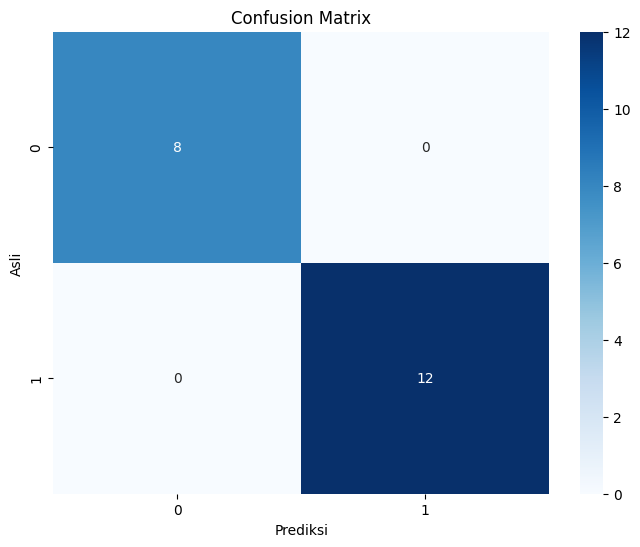

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Buat confusion matrix
cm = confusion_matrix(y_test_series, y_pred_pca_series)

# Visualisasikan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test_series), yticklabels=set(y_test_series))
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()